# Import Library

##### Import library untuk cv2, matplotlib dan numpy buat pustaka fungsonalitas untuk pengolahan citra, array dan pembuatan plot 

In [41]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

##### variabel citra untuk membaca via2.jpg, gunain imread untuk bacanya, ubah juga pake cvtColor biar keubah dr BGR ke RGB.

In [42]:
citra = cv2.imread("via2.jpg")
citra = cv2.cvtColor(citra, cv2.COLOR_BGR2RGB)

##### variabel kernel untuk membuat filter 2d, yang berisi matriks 3x3 dengan nilai -1, 6, dan -1 di baris kedua.

In [43]:
kernel = np.array([[0,-1,0], 
                [-1,6,-1], 
                [0,-1,0]])


##### citraOutput untuk bikin filter2d dari library cv2nya, ngebuat sublots dengan 1 baris dan 2 kolom, figsize buatravel buat histogram jd 1 dimensi. 0,0 itu untuk citra asli dan 1,1 untuk hasil filter 2d

Text(0.5, 1.0, 'filter')

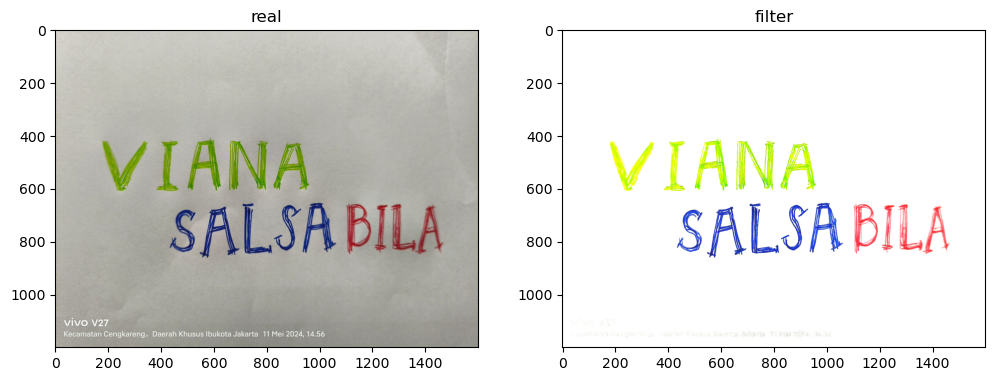

In [44]:
citraOutput = cv2.filter2D(citra, -1, kernel)

fig, axes = plt.subplots(1,2, figsize=(12,12))
ax = axes.ravel()

ax[0].imshow(citra)
ax[0].set_title('real')

ax[1].imshow(citraOutput)
ax[1].set_title('filter')

##### manipulasi dimensi untuk warna merah dengan nilai 0, hijau dengan 1, dan biru dengan 2 dari citraOutput. 

##### buat histogram dengan 3 baris dan 2 kolom, baris 1 untuk histogram warna merah, 2 untuk hijau dan 3 untuk biru

pada histogram warna : calchist itu dr library matplotib, gunanya untuk menghitung histogram dari citra, variabel warna 'merah'/'hijau'/'biru' adalah gambar yang akan dihitung histogramnya.
Histogram akan dihitung dari saluran warna pertama (indeks 0) dari gambar ini karena argumen kedua adalah [0].[0] indeks saluran warna yang akan dihitung histogramnya.None digunakan untuk mengindikasikan bahwa tidak ada maska yang digunakan untuk menghitung histogram. [256] adalah jumlah bin untuk histogram.[0,256] adalah rentang nilai piksel yang akan digunakan untuk menghitung histogram.

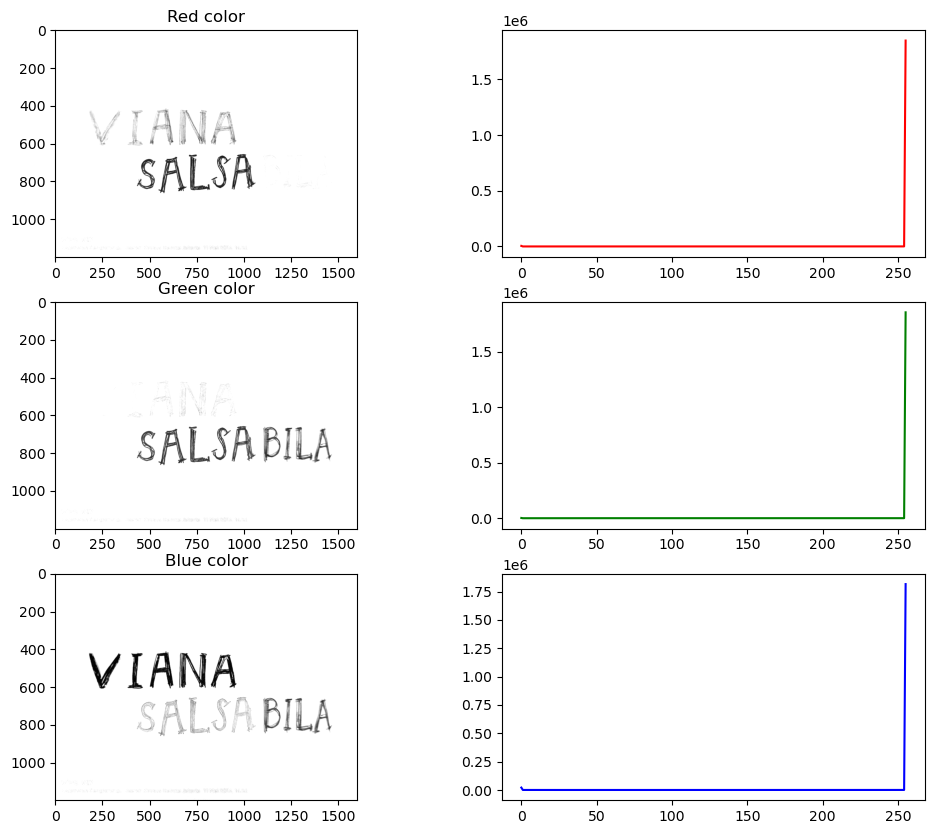

In [58]:
merah = citraOutput[:,:,0] # Merah
hijau = citraOutput[:,:,1] # Hijau
biru = citraOutput[:,:,2] # Biru

# Histogram
fig, axs = plt.subplots(3,2, figsize=(12,10))

# Histogram merah
hist_merah = cv2.calcHist([merah], [0], None, [256], [0,256])
axs[0,0].imshow(merah, cmap='gray')
axs[0,0].set_title('Red color')
axs[0,1].plot(hist_merah, color='r')

# Histogram hijau
hist_hijau = cv2.calcHist([hijau, merah], [0], None, [256], [0,256])
axs[1,0].imshow(hijau, cmap='gray')
axs[1,0].set_title('Green color')
axs[1,1].plot(hist_hijau, color='g')

# Histogram biru
hist_biru = cv2.calcHist([biru], [0], None, [256], [0,256])
axs[2,0].imshow(biru, cmap='gray')
axs[2,0].set_title('Blue color')
axs[2,1].plot(hist_biru, color='b')

plt.show()

# 2

##### dari citra output yang tadi diubah menjadi gray pakai cvtColor dari RGB ke Gray, dan masukin ke variabel gray

In [60]:
gray = cv2.cvtColor(citraOutput, cv2.COLOR_RGB2GRAY)

##### ploting mau 2 baris dan 2 kolom

menggunakan threshold pada library cv2 untuk menimbang nilai ambang batas
yang none, gray adalah citra grayscale yang ingin di-threshold. 3 adalah nilai ambang yang digunakan untuk thresholding. Piksel dengan intensitas di atas nilai ini akan diubah menjadi 255, sedangkan piksel dengan intensitas di bawah nilai ini akan diubah menjadi 0.
cv2.THRESH_BINARY adalah jenis thresholding yang digunakan.THRESH_BINARY ngubah piksel menjadi nilai maksimum jika melewati ambang, dan 0 jika tidak.

yang blue, merah adalah citra grayscale yang ingin di-threshold. 50 adalah nilai ambang yang digunakan untuk thresholding. Piksel dengan intensitas di atas nilai ini akan diubah menjadi 255, sedangkan piksel dengan intensitas di bawah nilai ini akan diubah menjadi 0.
cv2.THRESH_BINARY adalah jenis thresholding yang digunakan.THRESH_BINARY ngubah piksel menjadi nilai maksimum jika melewati ambang, dan 0 jika tidak.

yang red-blue, hijau adalah citra grayscale yang ingin di-threshold. 100 adalah nilai ambang yang digunakan untuk thresholding. Piksel dengan intensitas di atas nilai ini akan diubah menjadi 255, sedangkan piksel dengan intensitas di bawah nilai ini akan diubah menjadi 0.
cv2.THRESH_BINARY adalah jenis thresholding yang digunakan.THRESH_BINARY ngubah piksel menjadi nilai maksimum jika melewati ambang, dan 0 jika tidak.

yang red-green-blue, blue adalah citra grayscale yang ingin di-threshold. 201 adalah nilai ambang yang digunakan untuk thresholding. Piksel dengan intensitas di atas nilai ini akan diubah menjadi 255, sedangkan piksel dengan intensitas di bawah nilai ini akan diubah menjadi 0.
cv2.THRESH_BINARY adalah jenis thresholding yang digunakan.THRESH_BINARY ngubah piksel menjadi nilai maksimum jika melewati ambang, dan 0 jika tidak.


Text(0.5, 1.0, 'red-green-blue')

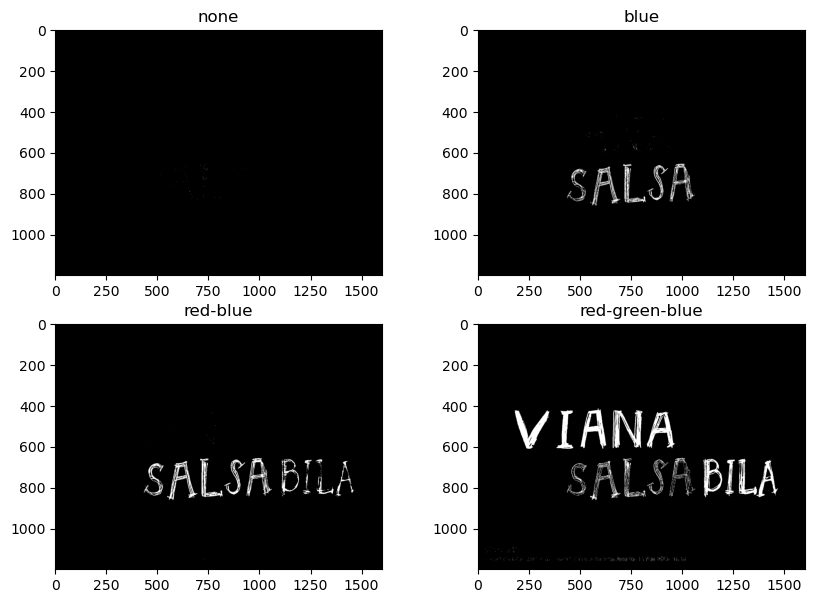

In [61]:
#Plotting
fig, axs = plt.subplots(2,2, figsize=(10,7))

(thresh, binary) = cv2.threshold (gray, 3, 255, cv2.THRESH_BINARY)
(thresh, binary_2) = cv2.threshold (merah, 50, 255, cv2.THRESH_BINARY)
(thresh, binary_3) = cv2.threshold (hijau, 100, 255, cv2.THRESH_BINARY)
(thresh, binary_4) = cv2.threshold (biru, 201, 255, cv2.THRESH_BINARY)

axs[0,0].imshow(binary, cmap='binary')
axs[0,0].set_title('none')
axs[0,1].imshow(binary_2, cmap='binary')
axs[0,1].set_title('blue')
axs[1,0].imshow(binary_3, cmap='binary')
axs[1,0].set_title('red-blue')
axs[1,1].imshow(binary_4, cmap='binary')
axs[1,1].set_title('red-green-blue')